<a href="https://colab.research.google.com/github/aminekhasteh/DeepLearningFinalReport2020/blob/master/RESNET_with_FASTAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

Setting the Batch Size

In [4]:
bs = 64

Setting the path for images:

In [5]:
image_path_fastai = Path('/content/drive/My Drive/Colab Notebooks/Breast Cancer/images')

In [6]:
classes = [f for f in os.listdir(image_path_fastai) if os.path.isdir(os.path.join(image_path_fastai, f))]
classes = classes[1:]

In [7]:
for c in classes:
    print(c)
    verify_images(image_path_fastai/c, delete=True, max_size=256)

Stage IIB


Stage IIA


Stage IIIA


Stage IIIC


Stage IA


Stage I


Stage II


models


This function transforms the imaging data.The first one uses the original data and the second one flips and zooms in the images.

In [8]:

#tfms = None
#tfms = get_transforms(do_flip=True, flip_vert = False, max_zoom=1.5)

In [9]:
np.random.seed(6869)
data = ImageDataBunch.from_folder(image_path_fastai, train=".", valid_pct=0.2,
         size=224, num_workers=4).normalize(imagenet_stats)

We have 7 classes in total.

In [10]:
data.classes

['Stage I',
 'Stage IA',
 'Stage II',
 'Stage IIA',
 'Stage IIB',
 'Stage IIIA',
 'Stage IIIC']

Let's take a look at some of the images we have:

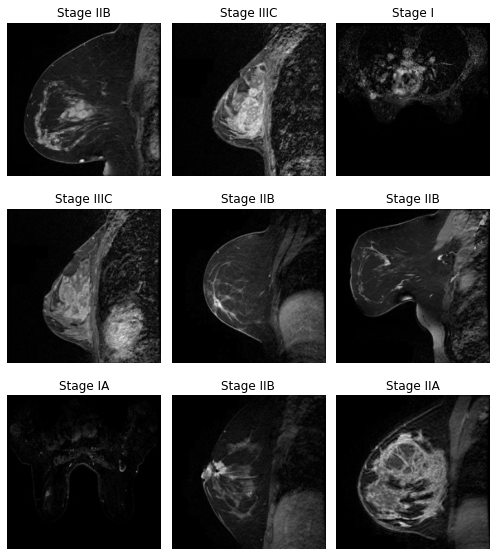

In [11]:
data.show_batch(rows=3, figsize=(7,8))

Defining the dataset

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Stage I',
  'Stage IA',
  'Stage II',
  'Stage IIA',
  'Stage IIB',
  'Stage IIIA',
  'Stage IIIC'],
 7,
 597,
 149)

Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. 

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


We will train for 10 epochs (10 cycles through all our data).

In [14]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.096884,3.683488,0.852349,00:06
1,2.381206,3.072090,0.718121,00:06
2,1.777954,3.061699,0.590604,00:06
3,1.302033,2.455101,0.496644,00:06
4,0.997611,1.725766,0.429530,00:06
5,0.775572,0.867976,0.255034,00:06
6,0.617009,0.446412,0.134228,00:06
7,0.496774,0.321998,0.100671,00:06
8,0.410060,0.291662,0.087248,00:06
9,0.338722,0.287039,0.080537,00:06


In [15]:
learn.save('stage-1')

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


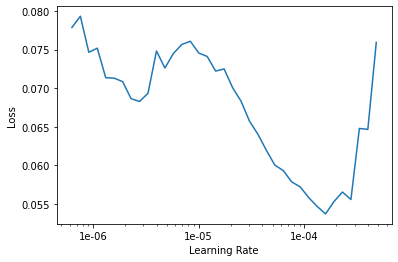

In [18]:
learn.recorder.plot()

Relearning the model with the best learning rate:

In [19]:
learn.fit_one_cycle(5, max_lr=slice(7e-5,7e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.086777,0.690852,0.161074,00:07
1,0.138099,0.810401,0.221477,00:07
2,0.178421,0.355220,0.114094,00:07
3,0.152684,0.223429,0.080537,00:07
4,0.119034,0.119703,0.053691,00:07


In [20]:
learn.save('stage-2')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

Model interpretation:

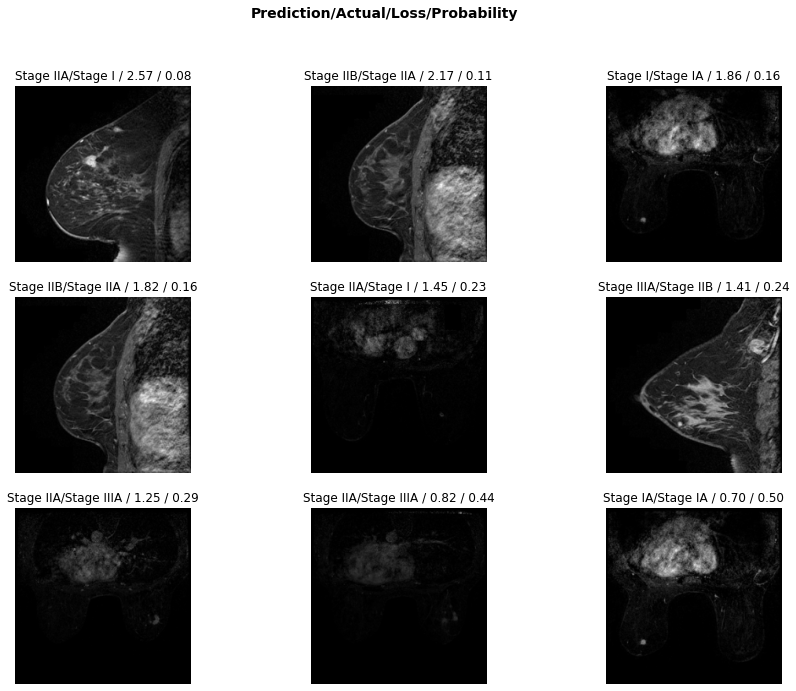

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

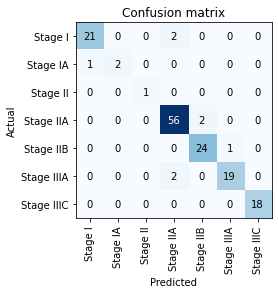

In [23]:
interp.plot_confusion_matrix()